In [17]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import os

# ------------------------------
# TU Delft colour palette (no orange)
# ------------------------------
TUD_BLUE        = "#00A6D6"   # primary
TUD_DARK_BLUE   = "#003C8F"   # strong contrast
TUD_LIGHT_BLUE  = "#6DCFF6"   # highlight
TUD_DARK_GREY   = "#4D4D4D"   # neutral
TUD_LIGHT_GREY  = "#D9D9D9"   # soft neutral

# # Updated rcParams
# plt.rcParams.update({
#     "figure.figsize": (7, 4),
#     "axes.spines.top": False,
#     "axes.spines.right": False,
#     "axes.grid": True,
#     "grid.linestyle": "--",
#     "grid.alpha": 0.28,
#     # cycling ONLY through the allowed TU Delft colours
#     "axes.prop_cycle": plt.cycler(color=[
#         TUD_DARK_BLUE, 
#         TUD_BLUE, 
#         TUD_LIGHT_BLUE,
#         TUD_DARK_GREY,
#     ]),
#     "font.size": 12,
# })

outdir = "notebooks/plaatjes/E/figures"

def savefig(name: str):
    os.makedirs(outdir, exist_ok=True)
    path = os.path.join(outdir, f"{name}.png")
    plt.savefig(path, dpi=300, bbox_inches="tight")
    print(f"Saved: {path}")


Saved: notebooks/plaatjes/E/figures\extra_A_operator_mapping.png


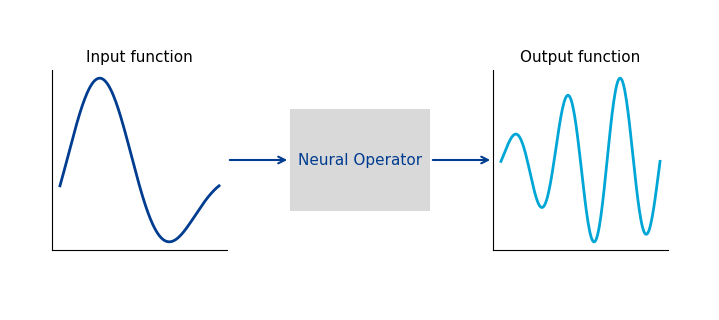

In [18]:
# %%
# Figure A — Operator learning an input→output mapping between functions

import numpy as np
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(7, 3))[0]
fig.clf()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")

# Small axes for input and output functions
ax_in = fig.add_axes([0.06, 0.2, 0.25, 0.6])
ax_out = fig.add_axes([0.69, 0.2, 0.25, 0.6])

x = np.linspace(0, 1, 200)
u_in = np.sin(2 * np.pi * x) * np.exp(-3 * (x - 0.25) ** 2)
u_out = np.sin(6 * np.pi * x) * np.exp(-3 * (x - 0.7) ** 2)

ax_in.plot(x, u_in, color=TUD_DARK_BLUE, linewidth=2)
ax_in.set_title("Input function", fontsize=11)
ax_in.set_xticks([])
ax_in.set_yticks([])

ax_out.plot(x, u_out, color=TUD_BLUE, linewidth=2)
ax_out.set_title("Output function", fontsize=11)
ax_out.set_xticks([])
ax_out.set_yticks([])

# Operator box in the middle
from matplotlib.patches import FancyBboxPatch
ax_box = fig.add_axes([0.4, 0.33, 0.2, 0.34])
ax_box.axis("off")
box = FancyBboxPatch(
    (0, 0), 1, 1,
    boxstyle="round,pad=0.2",
    linewidth=1.5,
    edgecolor=TUD_DARK_BLUE,
    facecolor=TUD_LIGHT_GREY,
)
ax_box.add_patch(box)
ax_box.text(0.5, 0.5, r"Neural Operator", ha="center", va="center",
            fontsize=11, color=TUD_DARK_BLUE)

# Arrows from input → operator → output
ax.annotate(
    "", xy=(0.40, 0.5), xytext=(0.31, 0.5),
    arrowprops=dict(arrowstyle="->", linewidth=1.5, color=TUD_DARK_BLUE)
)
ax.annotate(
    "", xy=(0.69, 0.5), xytext=(0.60, 0.5),
    arrowprops=dict(arrowstyle="->", linewidth=1.5, color=TUD_DARK_BLUE)
)

savefig("extra_A_operator_mapping")
plt.show()
plt.close(fig)


Saved: notebooks/plaatjes/E/figures\extra_B_branch_trunk_architecture.png


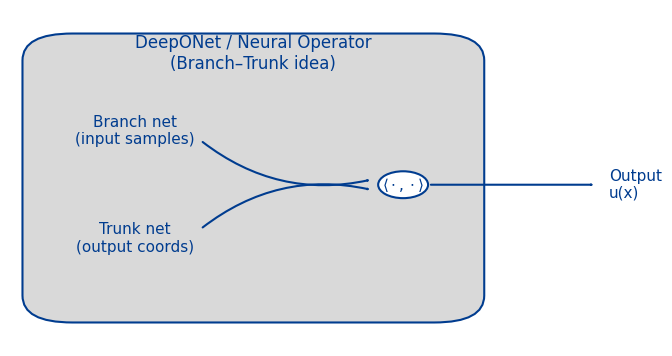

In [19]:
# %%
# Figure B — DeepONet-style Branch/Trunk architecture (conceptual, improved)

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch

fig, ax = plt.subplots(figsize=(6.5, 3.5))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# --- main capsule background (branch + trunk live inside this) ---
capsule = FancyBboxPatch(
    (0.05, 0.10), 0.68, 0.80,
    boxstyle="round,pad=0.03,rounding_size=0.08",
    edgecolor=TUD_DARK_BLUE,
    facecolor=TUD_LIGHT_GREY,
    linewidth=1.5,
)
ax.add_patch(capsule)

# --- title inside capsule ---
ax.text(
    0.39, 0.87,
    "DeepONet / Neural Operator\n(Branch–Trunk idea)",
    ha="center", va="center",
    fontsize=12, color=TUD_DARK_BLUE,
)

# --- branch and trunk labels (no separate boxes, just text) ---
branch_pos = (0.20, 0.64)
trunk_pos  = (0.20, 0.32)

ax.text(
    *branch_pos,
    "Branch net\n(input samples)",
    ha="center", va="center",
    fontsize=11, color=TUD_DARK_BLUE,
)

ax.text(
    *trunk_pos,
    "Trunk net\n(output coords)",
    ha="center", va="center",
    fontsize=11, color=TUD_DARK_BLUE,
)

# --- combination circle at the right side of capsule ---
comb_center = (0.63, 0.48)
comb_radius = 0.04

comb_circle = Circle(
    comb_center, comb_radius,
    edgecolor=TUD_DARK_BLUE,
    facecolor="white",
    linewidth=1.5,
)
ax.add_patch(comb_circle)
ax.text(
    *comb_center,
    r"$\langle\cdot,\cdot\rangle$",
    ha="center", va="center",
    fontsize=11, color=TUD_DARK_BLUE,
)

# --- curved arrows from branch/trunk into combination circle ---
arrow_kwargs = dict(
    arrowstyle="->",
    linewidth=1.5,
    color=TUD_DARK_BLUE,
    shrinkA=5,
    shrinkB=6,
)

branch_arrow = FancyArrowPatch(
    posA=(branch_pos[0] + 0.10, branch_pos[1] - 0.02),
    posB=(comb_center[0] - comb_radius, comb_center[1] + 0.02),
    connectionstyle="arc3,rad=0.25",
    **arrow_kwargs,
)
ax.add_patch(branch_arrow)

trunk_arrow = FancyArrowPatch(
    posA=(trunk_pos[0] + 0.10, trunk_pos[1] + 0.02),
    posB=(comb_center[0] - comb_radius, comb_center[1] - 0.02),
    connectionstyle="arc3,rad=-0.25",
    **arrow_kwargs,
)
ax.add_patch(trunk_arrow)

# --- output arrow to the right ---
out_start = (comb_center[0] + comb_radius, comb_center[1])
out_end   = (0.94, comb_center[1])

out_arrow = FancyArrowPatch(
    posA=out_start,
    posB=out_end,
    arrowstyle="->",
    linewidth=1.5,
    color=TUD_DARK_BLUE,
)
ax.add_patch(out_arrow)

ax.text(
    0.96, comb_center[1],
    "Output\nu(x)",
    ha="left", va="center",
    fontsize=11, color=TUD_DARK_BLUE,
)

# optional: tighten layout a bit visually
fig.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)

savefig("extra_B_branch_trunk_architecture")
plt.show()
plt.close(fig)


Saved: notebooks/plaatjes/E/figures\extra_C_FNO_block_nonoverlapping.png


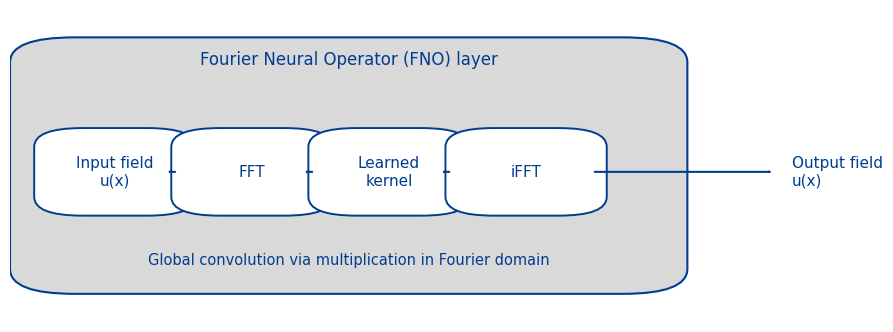

In [23]:
# %%
# Improved Figure C — No overlapping blocks, clean spacing

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(8.4, 3.4))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# --- main capsule background ---
capsule = FancyBboxPatch(
    (0.03, 0.12), 0.78, 0.76,
    boxstyle="round,pad=0.03,rounding_size=0.08",
    edgecolor=TUD_DARK_BLUE,
    facecolor=TUD_LIGHT_GREY,
    linewidth=1.5,
)
ax.add_patch(capsule)

ax.text(
    0.42, 0.84,
    "Fourier Neural Operator (FNO) layer",
    ha="center", va="center",
    fontsize=12, color=TUD_DARK_BLUE,
)

# --- helper to draw a non-overlapping block ---
def small_block(center_x, label):
    w, h = 0.14, 0.22
    x = center_x - w / 2
    y = 0.48 - h / 2
    block = FancyBboxPatch(
        (x, y), w, h,
        boxstyle="round,pad=0.03,rounding_size=0.06",
        edgecolor=TUD_DARK_BLUE,
        facecolor="white",
        linewidth=1.4,
    )
    ax.add_patch(block)
    ax.text(
        center_x, 0.48,
        label, ha="center", va="center",
        fontsize=11, color=TUD_DARK_BLUE,
    )
    return (x + w + 0.01, 0.48)  # return right-edge center for arrow start

# --- WELL-SPACED block centers ---
x_centers = [0.13, 0.30, 0.47, 0.64]
labels = [
    "Input field\nu(x)",
    "FFT",
    "Learned\nkernel",
    "iFFT",
]

arrow_starts = []
for xc, lab in zip(x_centers, labels):
    arrow_starts.append(small_block(xc, lab))

# --- arrows between blocks ---
arrow_kwargs = dict(
    arrowstyle="->",
    linewidth=1.5,
    color=TUD_DARK_BLUE,
    shrinkA=3,
    shrinkB=3,
)

for (x_start, y), xc_next in zip(arrow_starts[:-1], x_centers[1:]):
    x_end = xc_next - 0.11  # leave more space before next block
    arrow = FancyArrowPatch(
        posA=(x_start, y),
        posB=(x_end, y),
        **arrow_kwargs
    )
    ax.add_patch(arrow)

# --- final arrow to output outside capsule ---
last_right, y_mid = arrow_starts[-1]
out_arrow = FancyArrowPatch(
    posA=(last_right, y_mid),
    posB=(0.95, y_mid),
    arrowstyle="->",
    linewidth=1.5,
    color=TUD_DARK_BLUE,
    shrinkA=3,
    shrinkB=3,
)
ax.add_patch(out_arrow)

ax.text(
    0.97, y_mid,
    "Output field\nu(x)",
    ha="left", va="center",
    fontsize=11, color=TUD_DARK_BLUE,
)

# --- caption inside capsule bottom ---
ax.text(
    0.42, 0.20,
    "Global convolution via multiplication in Fourier domain",
    ha="center", va="center",
    fontsize=10.5, color=TUD_DARK_BLUE,
)

fig.subplots_adjust(left=0.02, right=0.98, top=0.96, bottom=0.04)

savefig("extra_C_FNO_block_nonoverlapping")
plt.show()
plt.close(fig)


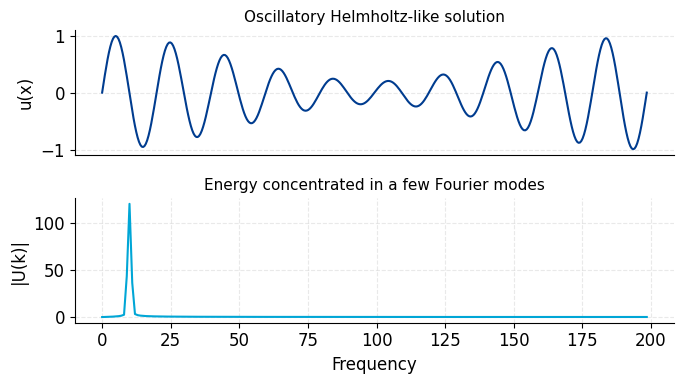

Saved: notebooks/plaatjes/E/figures\extra_D_wavefield_and_spectrum.png


<Figure size 700x400 with 0 Axes>

In [8]:
# %%
# Figure D — Oscillatory wavefield and its Fourier spectrum (FNO motivation)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 400)
u = np.sin(10 * 2 * np.pi * x) * (0.6 + 0.4 * np.cos(2 * np.pi * x))

U = np.fft.fft(u)
freq = np.fft.fftfreq(len(u), d=x[1] - x[0])

fig, axes = plt.subplots(2, 1, figsize=(7, 4), sharex=False)
(ax1, ax2) = axes

ax1.plot(x, u, color=TUD_DARK_BLUE, linewidth=1.5)
ax1.set_ylabel("u(x)")
ax1.set_xticks([])
ax1.set_title("Oscillatory Helmholtz-like solution", fontsize=11)

# Only positive frequencies
mask = freq >= 0
ax2.plot(freq[mask], np.abs(U[mask]), color=TUD_BLUE, linewidth=1.5)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("|U(k)|")
ax2.set_title("Energy concentrated in a few Fourier modes", fontsize=11)

fig.tight_layout()
plt.show()
savefig("extra_D_wavefield_and_spectrum")
plt.close(fig)


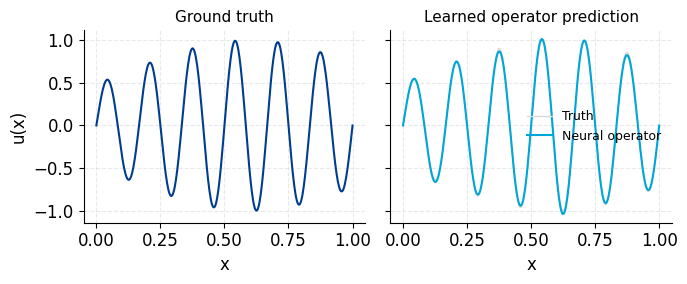

Saved: notebooks/plaatjes/E/figures\extra_E_truth_vs_neural_operator.png


<Figure size 700x400 with 0 Axes>

In [9]:
# %%
# Figure E — Ground truth vs neural-operator prediction (two panels)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 400)
u_true = np.sin(12 * np.pi * x) * np.exp(-2 * (x - 0.6) ** 2)
u_pred = u_true * (1 + 0.04 * np.sin(4 * np.pi * x))  # slight distortion

fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
(ax1, ax2) = axes

ax1.plot(x, u_true, color=TUD_DARK_BLUE, linewidth=1.5)
ax1.set_title("Ground truth", fontsize=11)
ax1.set_xlabel("x")
ax1.set_ylabel("u(x)")

ax2.plot(x, u_true, color=TUD_LIGHT_GREY, linewidth=1.0, label="Truth")
ax2.plot(x, u_pred, color=TUD_BLUE, linewidth=1.5, label="Neural operator")
ax2.set_title("Learned operator prediction", fontsize=11)
ax2.set_xlabel("x")
ax2.legend(frameon=False, fontsize=9)

fig.tight_layout()
plt.show()
savefig("extra_E_truth_vs_neural_operator")
plt.close(fig)


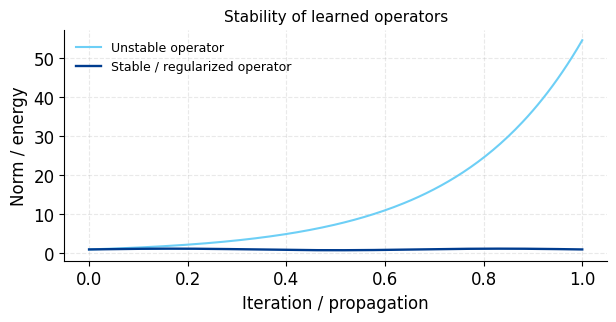

Saved: notebooks/plaatjes/E/figures\extra_F_stability_curves.png


<Figure size 700x400 with 0 Axes>

In [10]:
# %%
# Figure F — Stability curves: unstable vs stable learned operators

t = np.linspace(0, 1, 200)
unstable = np.exp(4 * t)  # exaggerated growth
stable = 1 + 0.2 * np.sin(3 * np.pi * t)

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(t, unstable, label="Unstable operator", color=TUD_LIGHT_BLUE, linewidth=1.5)
ax.plot(t, stable, label="Stable / regularized operator", color=TUD_DARK_BLUE, linewidth=1.7)

ax.set_xlabel("Iteration / propagation")
ax.set_ylabel("Norm / energy")
ax.set_title("Stability of learned operators", fontsize=11)
ax.legend(frameon=False, fontsize=9)

plt.show()
savefig("extra_F_stability_curves")
plt.close(fig)


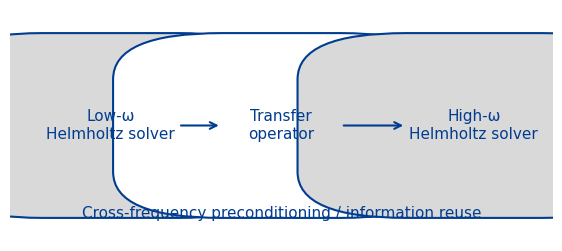

Saved: notebooks/plaatjes/E/figures\extra_G_cross_frequency_transfer.png


<Figure size 700x400 with 0 Axes>

In [11]:
# %%
# Figure G — Cross-frequency transfer: low → high frequency solver

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(7, 3))
ax.axis("off")

# Low-frequency solver box
low_box = FancyBboxPatch(
    (0.06, 0.3), 0.25, 0.4,
    boxstyle="round,pad=0.2",
    edgecolor=TUD_DARK_BLUE,
    facecolor=TUD_LIGHT_GREY,
    linewidth=1.5,
)
ax.add_patch(low_box)
ax.text(0.185, 0.5, "Low-ω\nHelmholtz solver", ha="center", va="center",
        fontsize=11, color=TUD_DARK_BLUE)

# Transfer operator box
transfer_box = FancyBboxPatch(
    (0.39, 0.3), 0.22, 0.4,
    boxstyle="round,pad=0.2",
    edgecolor=TUD_DARK_BLUE,
    facecolor="white",
    linewidth=1.5,
)
ax.add_patch(transfer_box)
ax.text(0.50, 0.5, "Transfer\noperator", ha="center", va="center",
        fontsize=11, color=TUD_DARK_BLUE)

# High-frequency solver box
high_box = FancyBboxPatch(
    (0.73, 0.3), 0.25, 0.4,
    boxstyle="round,pad=0.2",
    edgecolor=TUD_DARK_BLUE,
    facecolor=TUD_LIGHT_GREY,
    linewidth=1.5,
)
ax.add_patch(high_box)
ax.text(0.855, 0.5, "High-ω\nHelmholtz solver", ha="center", va="center",
        fontsize=11, color=TUD_DARK_BLUE)

# Arrows between boxes
ax.annotate(
    "", xy=(0.39, 0.5), xytext=(0.31, 0.5),
    arrowprops=dict(arrowstyle="->", linewidth=1.5, color=TUD_DARK_BLUE)
)
ax.annotate(
    "", xy=(0.73, 0.5), xytext=(0.61, 0.5),
    arrowprops=dict(arrowstyle="->", linewidth=1.5, color=TUD_DARK_BLUE)
)

ax.text(0.5, 0.12, "Cross-frequency preconditioning / information reuse",
        ha="center", va="center", fontsize=11, color=TUD_DARK_BLUE)

plt.show()
savefig("extra_G_cross_frequency_transfer")
plt.close(fig)


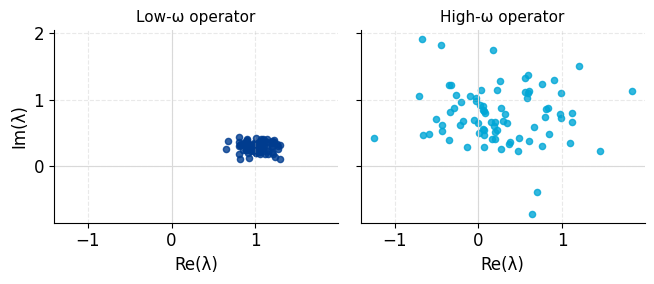

Saved: notebooks/plaatjes/E/figures\extra_H_low_vs_high_spectrum.png


<Figure size 700x400 with 0 Axes>

In [12]:
# %%
# Figure H — Spectral picture: low-frequency vs high-frequency Helmholtz operator

rng = np.random.default_rng(0)

fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharex=True, sharey=True)
(ax1, ax2) = axes

# Low-frequency: cluster well away from origin
low_real = rng.normal(1.0, 0.15, 80)
low_imag = rng.normal(0.3, 0.08, 80)
ax1.scatter(low_real, low_imag, color=TUD_DARK_BLUE, alpha=0.8, s=20)
ax1.axhline(0, color=TUD_LIGHT_GREY, linewidth=0.8)
ax1.axvline(0, color=TUD_LIGHT_GREY, linewidth=0.8)
ax1.set_title("Low-ω operator", fontsize=11)
ax1.set_xlabel("Re(λ)")
ax1.set_ylabel("Im(λ)")

# High-frequency: more spread, some near 0
high_real = rng.normal(0.3, 0.5, 80)
high_imag = rng.normal(0.8, 0.4, 80)
ax2.scatter(high_real, high_imag, color=TUD_BLUE, alpha=0.8, s=20)
ax2.axhline(0, color=TUD_LIGHT_GREY, linewidth=0.8)
ax2.axvline(0, color=TUD_LIGHT_GREY, linewidth=0.8)
ax2.set_title("High-ω operator", fontsize=11)
ax2.set_xlabel("Re(λ)")

fig.tight_layout()
plt.show()
savefig("extra_H_low_vs_high_spectrum")
plt.close(fig)


Saved: notebooks/plaatjes/E/figures\extra_I_landscape_methods.png


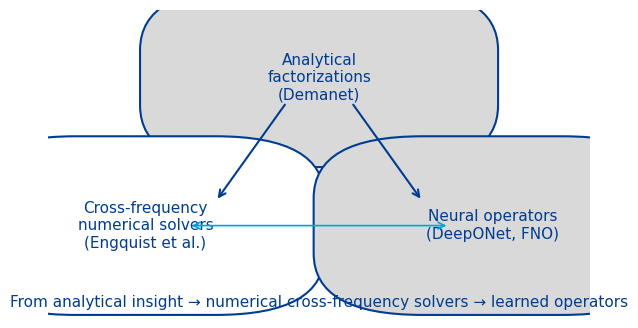

In [13]:
# %%
# Figure I — Landscape of methods: analytical, numerical, and learned frequency transfer

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(7, 4))
ax.axis("off")

def method_box(center, label, color_face):
    x, y = center
    w, h = 0.26, 0.18
    box = FancyBboxPatch(
        (x - w / 2, y - h / 2), w, h,
        boxstyle="round,pad=0.2",
        edgecolor=TUD_DARK_BLUE,
        facecolor=color_face,
        linewidth=1.5,
    )
    ax.add_patch(box)
    ax.text(x, y, label, ha="center", va="center",
            fontsize=11, color=TUD_DARK_BLUE)

# Positions: triangle layout
method_box((0.5, 0.78), "Analytical\nfactorizations\n(Demanet)", TUD_LIGHT_GREY)
method_box((0.18, 0.3), "Cross-frequency\nnumerical solvers\n(Engquist et al.)", "white")
method_box((0.82, 0.3), "Neural operators\n(DeepONet, FNO)", TUD_LIGHT_GREY)

# Arrows indicating evolution / connections
arrow_kw = dict(arrowstyle="->", linewidth=1.5, color=TUD_DARK_BLUE)
ax.annotate("", xy=(0.31, 0.38), xytext=(0.44, 0.70), arrowprops=arrow_kw)
ax.annotate("", xy=(0.69, 0.38), xytext=(0.56, 0.70), arrowprops=arrow_kw)
ax.annotate("", xy=(0.74, 0.30), xytext=(0.26, 0.30), arrowprops=dict(
    arrowstyle="<->", linewidth=1.2, color=TUD_BLUE))

ax.text(0.5, 0.05,
        "From analytical insight → numerical cross-frequency solvers → learned operators",
        ha="center", va="center", fontsize=11, color=TUD_DARK_BLUE)

savefig("extra_I_landscape_methods")
plt.show()
plt.close(fig)


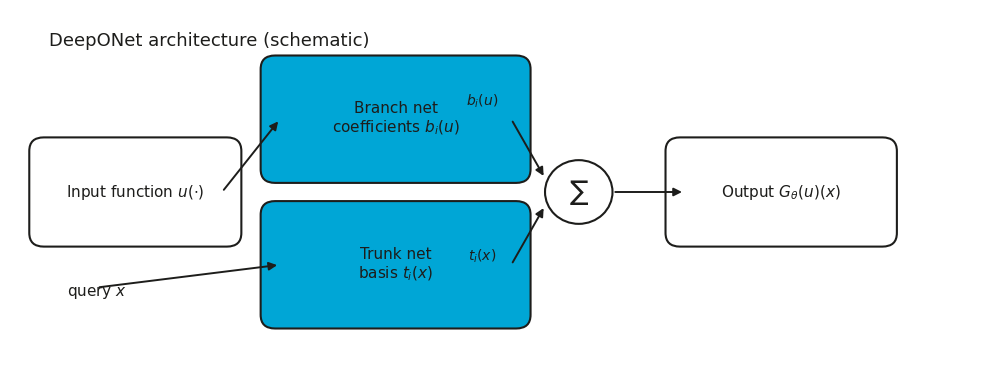

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# TU Delft–like colors (approximate)
tud_blue = "#00A6D6"
tud_dark = "#1D1D1B"
tud_light_gray = "#F2F2F2"

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 4)
ax.axis('off')

def add_box(x, y, width, height, text,
            facecolor=tud_light_gray, edgecolor=tud_dark):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.2,rounding_size=0.15",
        linewidth=1.5,
        edgecolor=edgecolor,
        facecolor=facecolor,
    )
    ax.add_patch(box)
    ax.text(
        x + width / 2,
        y + height / 2,
        text,
        ha="center",
        va="center",
        fontsize=11,
        color=tud_dark,
    )
    return box

def add_arrow(x1, y1, x2, y2):
    arrow = FancyArrowPatch(
        (x1, y1),
        (x2, y2),
        arrowstyle="-|>",
        linewidth=1.4,
        color=tud_dark,
        mutation_scale=12,
    )
    ax.add_patch(arrow)

# --- Boxes ---

# Input function u(·)
input_box = add_box(
    0.4, 1.6, 1.8, 0.8,
    r"Input function $u(\cdot)$",
    facecolor="white"
)

# Branch net
branch_box = add_box(
    2.8, 2.3, 2.4, 1.0,
    "Branch net\ncoefficients $b_i(u)$",
    facecolor=tud_blue,
    edgecolor=tud_dark,
)

# Trunk net
trunk_box = add_box(
    2.8, 0.7, 2.4, 1.0,
    "Trunk net\nbasis $t_i(x)$",
    facecolor=tud_blue,
    edgecolor=tud_dark,
)

# Sum node (circle)
sum_x, sum_y, sum_r = 5.9, 2.0, 0.35
circle = plt.Circle(
    (sum_x, sum_y), sum_r,
    edgecolor=tud_dark,
    facecolor="white",
    linewidth=1.5,
)
ax.add_patch(circle)
ax.text(sum_x, sum_y, r"$\sum$", ha="center", va="center",
        fontsize=14, color=tud_dark)

# Output box
output_box = add_box(
    7.0, 1.6, 2.0, 0.8,
    r"Output $G_\theta(u)(x)$",
    facecolor="white",
)

# --- Label and marker for x ---
ax.text(0.9, 0.9, r"query $x$", ha="center", va="center",
        fontsize=11, color=tud_dark)

# --- Arrows ---

# u(·) -> Branch net
add_arrow(0.4 + 1.8, 2.0, 2.8, 2.8)

# x -> Trunk net
add_arrow(0.9, 0.95, 2.8, 1.2)

# Branch net -> sum node
add_arrow(2.8 + 2.4, 2.8, sum_x - sum_r, 2.15)
ax.text(4.9, 2.95, r"$b_i(u)$", fontsize=10, color=tud_dark, ha="center")

# Trunk net -> sum node
add_arrow(2.8 + 2.4, 1.2, sum_x - sum_r, 1.85)
ax.text(4.9, 1.25, r"$t_i(x)$", fontsize=10, color=tud_dark, ha="center")

# Sum node -> output
add_arrow(sum_x + sum_r, sum_y, 7.0, 2.0)

# Title
ax.text(0.4, 3.6, "DeepONet architecture (schematic)",
        fontsize=13, color=tud_dark, ha="left")

plt.tight_layout()
plt.show()


TypeError: draw_arrow() missing 1 required positional argument: 'ax'

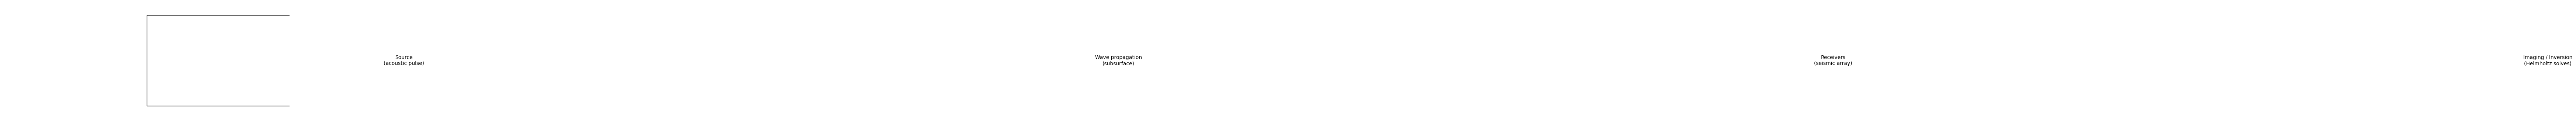

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

# Create figure
fig, ax = plt.subplots(figsize=(10, 4))

# Turn off axes
ax.axis('off')

# Helper to draw labeled box
def draw_box(x, y, width, height, label, ax):
    rect = Rectangle((x, y), width, height, fill=False)
    ax.add_patch(rect)
    ax.text(
        x + width / 2,
        y + height / 2,
        label,
        ha="center",
        va="center",
        fontsize=10,
    )

# Box geometry
box_width = 1.8
box_height = 0.8
y_center = 0.5

# Draw the main boxes
draw_box(0.5, y_center - box_height / 2, box_width, box_height,
         "Source\n(acoustic pulse)", ax)
draw_box(3.0, y_center - box_height / 2, box_width, box_height,
         "Wave propagation\n(subsurface)", ax)
draw_box(5.5, y_center - box_height / 2, box_width, box_height,
         "Receivers\n(seismic array)", ax)
draw_box(8.0, y_center - box_height / 2, box_width, box_height,
         "Imaging / Inversion\n(Helmholtz solves)", ax)

# Helper to draw arrows
def draw_arrow(x1, y1, x2, y2, ax):
    arrow = FancyArrowPatch(
        (x1, y1),
        (x2, y2),
        arrowstyle="->",
        mutation_scale=12,
        linewidth=1.2,
    )
    ax.add_patch(arrow)

# Draw arrows between boxes
y_arrow = y_center
draw_arrow(0.5 + box_width, y_arrow, 3.0, y_arrow)   # Source -> Wave propagation
draw_arrow(3.0 + box_width, y_arrow, 5.5, y_arrow)   # Wave propagation -> Receivers
draw_arrow(5.5 + box_width, y_arrow, 8.0, y_arrow)   # Receivers -> Imaging

# Add small annotations above arrows
ax.text(2.2, y_arrow + 0.25, "down-going\nwavefield",
        ha="center", va="center", fontsize=9)
ax.text(4.7, y_arrow + 0.25, "reflections\n+ scattering",
        ha="center", va="center", fontsize=9)
ax.text(7.2, y_arrow + 0.25, "recorded\nseismic data",
        ha="center", va="center", fontsize=9)

# Caption at the bottom
ax.text(
    5, 0.05,
    "Schematic seismic experiment: a source emits waves that propagate through the subsurface,\n"
    "are recorded by receivers, and are processed by imaging/inversion algorithms based on Helmholtz solves.",
    ha="center",
    va="bottom",
    fontsize=9,
)

plt.tight_layout()
plt.show()
